In [52]:
#CMSClaims_data.CSV
#2003 forward. CMS compiles claims data for Medicare and Medicaid patients across a variety of categories and years. 
#This includes Inpatient and Outpatient claims, Master Beneficiary Summary Files, and many other files. 
#Indicators from this data source have been computed by personnel in CDC's Division for Heart Disease and Stroke Prevention (DHDSP). 
#This is one of the datasets provided by the National Cardiovascular Disease Surveillance System. The system is designed to 
#integrate multiple indicators from many data sources to provide a comprehensive picture of the public health burden of CVDs and associated 
#risk factors in the United States. The data are organized by location (national and state) and indicator. The data can be plotted as trends 
#and stratified by sex and race/ethnicity.

import pandas as pd
import numpy as np


# Read data file
CMS = pd.read_csv("CMSClaims_data.csv")
print(CMS.head(3))

CMS.describe()

#print(CMS.dtypes)
#print(CMS.shape)

#Lets clean up the data of NaN values
CMS2 = CMS['RowId'].dropna()
CMS2.shape

#print(CMS['RowId'].unique()
#print(CMS['PriorityArea1'].unique()
#CMS['DataSource'].unique()
unique_counts = CMS['DataSource'].value_counts()
print(unique_counts)




   RowId  YearStart LocationAbbr   LocationDesc DataSource  PriorityArea1  \
0    NaN       2016           US  United States   Medicare            NaN   
1    NaN       2017           US  United States   Medicare            NaN   
2    NaN       2018           US  United States   Medicare            NaN   

   PriorityArea2  PriorityArea3  PriorityArea4                    Class  ...  \
0            NaN            NaN            NaN  Cardiovascular Diseases  ...   
1            NaN            NaN            NaN  Cardiovascular Diseases  ...   
2            NaN            NaN            NaN  Cardiovascular Diseases  ...   

  Break_Out_Category Break_Out ClassId TopicId  QuestionId  Data_Value_TypeID  \
0               Race   Unknown      C1      T1       MD101              Crude   
1               Race   Unknown      C1      T1       MD101              Crude   
2               Race   Unknown      C1      T1       MD101              Crude   

   BreakOutCategoryId  BreakOutId  LocationId

In [ ]:
#Data Definition
RowId                         float64 - Unique Row indentifer for each entry in the CMS table
YearStart                       int64  - the starting year of CMS related service
LocationAbbr                   object  - Geo location abbreviation ( country)
LocationDesc                   object  - Geo Location description 
DataSource                     object  - Data source and type (i.e. medicare, medicaid)
PriorityArea1                 float64  - 
PriorityArea2                 float64
PriorityArea3                 float64
PriorityArea4                 float64
Class                          object
Topic                          object
Question                       object
Data_Value_Type                object
Data_Value_Unit                object
Data_Value                    float64
Data_Value_Alt                float64
Data_Value_Footnote_Symbol    float64
Data_Value_Footnote           float64
Low_Confidence_Limit          float64
High_Confidence_Limit         float64
Break_Out_Category             object
Break_Out                      object
ClassId                        object
TopicId                        object
QuestionId                     object
Data_Value_TypeID              object
BreakOutCategoryId             object
BreakOutId                     object
LocationId                      int64
GeoLocation                    object

In [60]:
#Data Cleaning

#lets replace the NaNs in Row
CMS.isnull().values.any()
# Assuming 'RowIds' is your index column with NaN values
#CMS.reset_index(inplace=True)
CMS.rename(columns={'index': 'RowIds'}, inplace=True)
has_nans = CMS['RowId'].isna().any()
if has_nans:
    print("There are still NaN values in the 'RowId' column.")
else:
    print("No NaN values in the 'RowId' column.")

There are still NaN values in the 'RowId' column.


In [61]:
CMS.head()


,RowId,YearStart,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Class,...,Break_Out_Category,Break_Out,ClassId,TopicId,QuestionId,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationId,GeoLocation
0,NaN,2016,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,...,Race,Unknown,C1,T1,MD101,Crude,BOC04,RAC08,59,NaN
1,NaN,2017,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,...,Race,Unknown,C1,T1,MD101,Crude,BOC04,RAC08,59,NaN
2,NaN,2018,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,...,Race,Unknown,C1,T1,MD101,Crude,BOC04,RAC08,59,NaN
3,NaN,2019,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,...,Gender,Male,C1,T1,MD101,Crude,BOC02,GEN01,59,NaN
4,NaN,2020,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,...,Gender,Male,C1,T1,MD101,Crude,BOC02,GEN01,59,NaN


In [62]:
print(CMS['PriorityArea1'].unique)
print(CMS['PriorityArea2'].unique)
print(CMS['PriorityArea3'].unique)
print(CMS.shape)
# all of the columns in question have NaN. so lets drop them.

<bound method Series.unique of 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
33449   NaN
33450   NaN
33451   NaN
33452   NaN
33453   NaN
Name: PriorityArea1, Length: 33454, dtype: float64>
<bound method Series.unique of 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
33449   NaN
33450   NaN
33451   NaN
33452   NaN
33453   NaN
Name: PriorityArea2, Length: 33454, dtype: float64>
<bound method Series.unique of 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
33449   NaN
33450   NaN
33451   NaN
33452   NaN
33453   NaN
Name: PriorityArea3, Length: 33454, dtype: float64>
(33454, 30)


In [63]:
CMS2= CMS.dropna(axis=1, how='all')
CMS2.shape
CMS2.head()


,YearStart,LocationAbbr,LocationDesc,DataSource,Class,Topic,Question,Data_Value_Type,Data_Value_Unit,Data_Value,...,Break_Out_Category,Break_Out,ClassId,TopicId,QuestionId,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationId,GeoLocation
0,2016,US,United States,Medicare,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease hospitalization r...,Crude,"Rate per 100,000",2367.6,...,Race,Unknown,C1,T1,MD101,Crude,BOC04,RAC08,59,NaN
1,2017,US,United States,Medicare,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease hospitalization r...,Crude,"Rate per 100,000",2403.7,...,Race,Unknown,C1,T1,MD101,Crude,BOC04,RAC08,59,NaN
2,2018,US,United States,Medicare,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease hospitalization r...,Crude,"Rate per 100,000",2482.3,...,Race,Unknown,C1,T1,MD101,Crude,BOC04,RAC08,59,NaN
3,2019,US,United States,Medicare,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease hospitalization r...,Crude,"Rate per 100,000",5395.0,...,Gender,Male,C1,T1,MD101,Crude,BOC02,GEN01,59,NaN
4,2020,US,United States,Medicare,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease hospitalization r...,Crude,"Rate per 100,000",4505.4,...,Gender,Male,C1,T1,MD101,Crude,BOC02,GEN01,59,NaN


In [64]:
#it looks like the LocationAbbr and LocationDesc States and will list the US when the geoloc is unknown(NaN).
#lets check the rest of the dataset to see if anything else should be modified:
for column in CMS2.columns:
    unique_counts = CMS2[column].value_counts()
    print(f"Column: {column}")
    print(unique_counts)
    print("\n")


Column: YearStart
YearStart
2016    5609
2017    5577
2019    5575
2018    5572
2020    5561
2021    5560
Name: count, dtype: int64


Column: LocationAbbr
LocationAbbr
AR    1281
ME    1278
US     720
NC     648
MA     648
NY     648
FL     648
KS     648
GA     648
OH     648
CT     648
NJ     648
IL     648
CA     648
TX     648
CO     648
WA     648
MN     647
VI     647
MI     647
OK     647
WI     647
PA     647
IA     647
OR     647
NV     647
TN     646
IN     645
SC     644
DE     644
NB     644
MO     644
LA     644
KY     643
UT     643
AL     642
NM     641
ID     641
HI     640
NH     639
MS     639
RI     634
AK     632
WV     630
DC     630
WY     627
MT     625
SD     623
VT     617
ND     614
AZ       9
Name: count, dtype: int64


Column: LocationDesc
LocationDesc
United States     720
New Jersey        648
North Carolina    648
Massachusetts     648
New York          648
Maryland          648
Florida           648
Kansas            648
Ohio              648
Georgia    

In [ ]:
#The above looks like what we should expect for this data set. 

In [ ]:
""""Somethoughts on the dataset:
-Its possible to do a correlation between columns like DiseaseSeverity and the other columns like breakout, locationDesc, etc.  Heat map here would be useful to see the visual correlations
-we could do a count of claims by disease state and by Age, gender and race trended over the years. 
- the geoloc column could add a deep level of granularity with the dataset during the visualization stage
""""

In [66]:
CMS2.columns = CMS2.columns.str.strip()

# Rename the columns
CMS2.columns = [col.replace('class', 'DiseaseState') if 'class' in col else col.replace('type', 'DiseaseSeverity') if 'type' in col else col for col in CMS2.columns]

# Print the head of the DataFrame
print(CMS2.head(10))

   YearStart LocationAbbr   LocationDesc DataSource                    Class  \
0       2016           US  United States   Medicare  Cardiovascular Diseases   
1       2017           US  United States   Medicare  Cardiovascular Diseases   
2       2018           US  United States   Medicare  Cardiovascular Diseases   
3       2019           US  United States   Medicare  Cardiovascular Diseases   
4       2020           US  United States   Medicare  Cardiovascular Diseases   
5       2021           US  United States   Medicare  Cardiovascular Diseases   
6       2017           US  United States   Medicare  Cardiovascular Diseases   
7       2021           US  United States   Medicare  Cardiovascular Diseases   
8       2019           MT        Montana   Medicare  Cardiovascular Diseases   
9       2018           US  United States   Medicare  Cardiovascular Diseases   

                                   Topic  \
0           Major Cardiovascular Disease   
1           Major Cardiovascula

In [67]:
CMS2.dtypes

YearStart                  int64
LocationAbbr              object
LocationDesc              object
DataSource                object
Class                     object
Topic                     object
Question                  object
Data_Value_Type           object
Data_Value_Unit           object
Data_Value               float64
Data_Value_Alt           float64
Low_Confidence_Limit     float64
High_Confidence_Limit    float64
Break_Out_Category        object
Break_Out                 object
ClassId                   object
TopicId                   object
QuestionId                object
Data_Value_TypeID         object
BreakOutCategoryId        object
BreakOutId                object
LocationId                 int64
GeoLocation               object
dtype: object

In [68]:
CMS2.columns

Index(['YearStart', 'LocationAbbr', 'LocationDesc', 'DataSource', 'Class',
       'Topic', 'Question', 'Data_Value_Type', 'Data_Value_Unit', 'Data_Value',
       'Data_Value_Alt', 'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Break_Out_Category', 'Break_Out', 'ClassId', 'TopicId', 'QuestionId',
       'Data_Value_TypeID', 'BreakOutCategoryId', 'BreakOutId', 'LocationId',
       'GeoLocation'],
      dtype='object')

In [69]:
# visualize some features:
CMS2.head()

,YearStart,LocationAbbr,LocationDesc,DataSource,Class,Topic,Question,Data_Value_Type,Data_Value_Unit,Data_Value,...,Break_Out_Category,Break_Out,ClassId,TopicId,QuestionId,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationId,GeoLocation
0,2016,US,United States,Medicare,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease hospitalization r...,Crude,"Rate per 100,000",2367.6,...,Race,Unknown,C1,T1,MD101,Crude,BOC04,RAC08,59,NaN
1,2017,US,United States,Medicare,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease hospitalization r...,Crude,"Rate per 100,000",2403.7,...,Race,Unknown,C1,T1,MD101,Crude,BOC04,RAC08,59,NaN
2,2018,US,United States,Medicare,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease hospitalization r...,Crude,"Rate per 100,000",2482.3,...,Race,Unknown,C1,T1,MD101,Crude,BOC04,RAC08,59,NaN
3,2019,US,United States,Medicare,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease hospitalization r...,Crude,"Rate per 100,000",5395.0,...,Gender,Male,C1,T1,MD101,Crude,BOC02,GEN01,59,NaN
4,2020,US,United States,Medicare,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease hospitalization r...,Crude,"Rate per 100,000",4505.4,...,Gender,Male,C1,T1,MD101,Crude,BOC02,GEN01,59,NaN


In [ ]:
# Geoloc has a lot of NaNs. Will need to think of how to deal with them.

In [ ]:

# 1.Identify features - LocationDesc,Topic,Break_Out,Break_Out_Category
# 2. find relationships between features - i.e.  Race or gender vs topic, 
# 3. create histograph of the features
# 4. Pearson correlation coefficients
# create a plot to show Data_ value  incidences per 100,000  by locationDesc

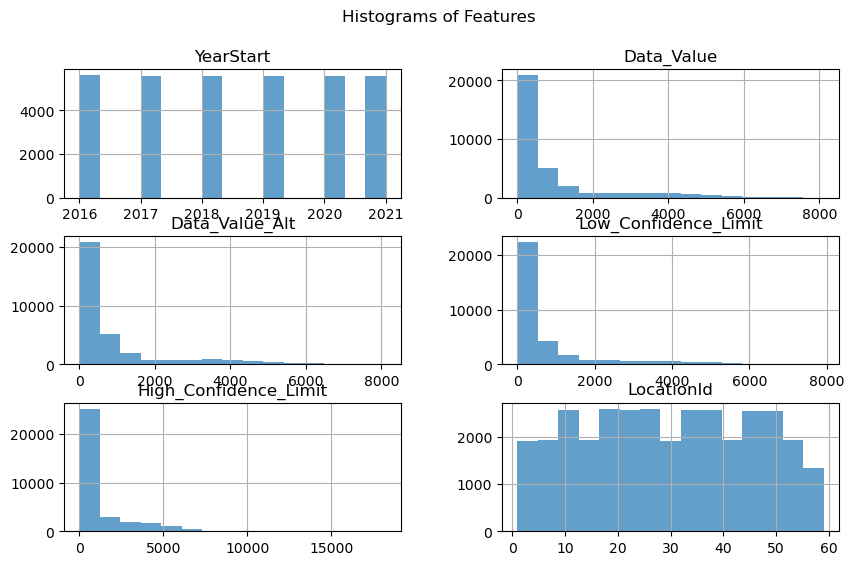

In [70]:
# 1.Identify features - LocationDesc,Topic,Break_Out,Break_Out_Category
import pandas as pd
import matplotlib.pyplot as plt
CMS2.hist(figsize=(10, 6), bins=15, alpha=0.7)
plt.suptitle('Histograms of Features')
plt.show()

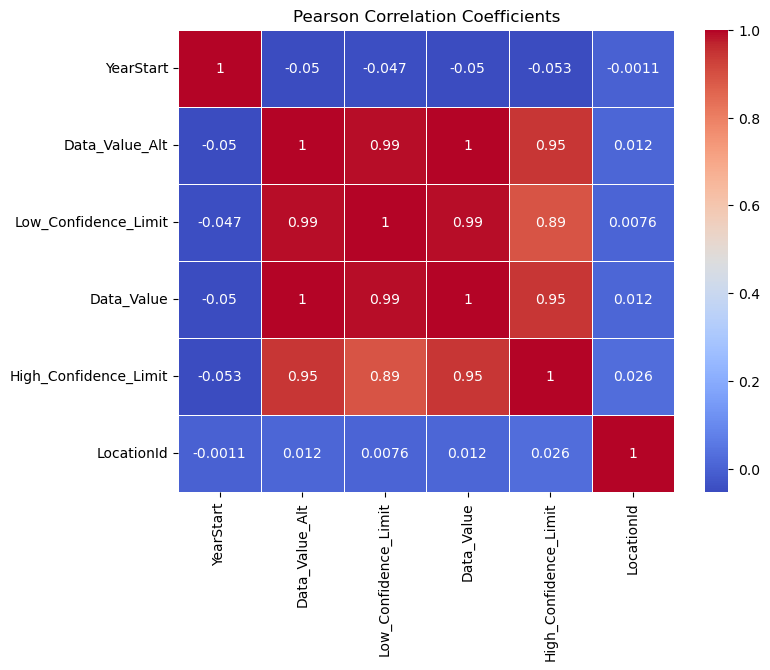

In [71]:
# 4. Pearson correlation coefficients
import seaborn as sns

selected_columns = ["YearStart", "Data_Value_Alt", "Low_Confidence_Limit", "Data_Value","High_Confidence_Limit","LocationId"]
correlation_matrix = CMS2[selected_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Pearson Correlation Coefficients')
plt.show()

In [72]:
#PreProcessing for CMS dataset.
#CMS2.columns
CMS2.head(5)


,YearStart,LocationAbbr,LocationDesc,DataSource,Class,Topic,Question,Data_Value_Type,Data_Value_Unit,Data_Value,...,Break_Out_Category,Break_Out,ClassId,TopicId,QuestionId,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationId,GeoLocation
0,2016,US,United States,Medicare,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease hospitalization r...,Crude,"Rate per 100,000",2367.6,...,Race,Unknown,C1,T1,MD101,Crude,BOC04,RAC08,59,NaN
1,2017,US,United States,Medicare,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease hospitalization r...,Crude,"Rate per 100,000",2403.7,...,Race,Unknown,C1,T1,MD101,Crude,BOC04,RAC08,59,NaN
2,2018,US,United States,Medicare,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease hospitalization r...,Crude,"Rate per 100,000",2482.3,...,Race,Unknown,C1,T1,MD101,Crude,BOC04,RAC08,59,NaN
3,2019,US,United States,Medicare,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease hospitalization r...,Crude,"Rate per 100,000",5395.0,...,Gender,Male,C1,T1,MD101,Crude,BOC02,GEN01,59,NaN
4,2020,US,United States,Medicare,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease hospitalization r...,Crude,"Rate per 100,000",4505.4,...,Gender,Male,C1,T1,MD101,Crude,BOC02,GEN01,59,NaN


In [73]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Handling Missing Values in 'GeoLocation'
CMS2.loc[:, 'GeoLocation'] = CMS2['GeoLocation'].fillna("Unknown")

# Normalization/Standardization
scaler = StandardScaler()
numerical_columns = ['Data_Value']
CMS2.loc[:, numerical_columns] = scaler.fit_transform(CMS2[numerical_columns])

# Time Series Analysis: Setting 'YearStart' as index
CMS2['YearStart'] = pd.to_datetime(CMS2['YearStart'], format='%Y')
CMS2.set_index('YearStart', inplace=True)

C:\Users\Joshua D\AppData\Local\Temp\ipykernel_44764\546770709.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CMS2['YearStart'] = pd.to_datetime(CMS2['YearStart'], format='%Y')


In [74]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Identifying categorical columns
categorical_columns = ['LocationDesc', 'Question', 'Data_Value_Type', 'Break_Out']  

# Creating dummy variables
CMS2 = pd.get_dummies(CMS2, columns=categorical_columns)

# Identifying numeric columns for standardization
numeric_columns = CMS2.select_dtypes(include=['int64', 'float64']).columns

# Standardizing the numeric features
scaler = StandardScaler()
CMS2[numeric_columns] = scaler.fit_transform(CMS2[numeric_columns])

# Now CMS2 is preprocessed with dummy variables for categorical data and standardized numeric features.

In [ ]:
#lets split the data set into training and test sets.

In [75]:
from sklearn.model_selection import train_test_split

# 'Data_Value' as the target variable
y = CMS2['Data_Value']

# Dropping the target variable from the features set
X = CMS2.drop(['Data_Value'], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

